In [1]:
import numpy as np
from scipy.io import loadmat
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
SIGN = ['ALPHA', 'BETA', 'DELTA', 'THETA']
CLASS = ['AD', 'SCI', 'MCI']
SignToInd = {'ALPHA' : 0, 'BETA' : 1, 'DELTA' : 2, 'THETA': 3}
ClassToInd = {'AD' : 0, 'SCI' : 1, 'MCI' : 2}

In [3]:
/Users/szeberinricsi/Documents/TRIED/mc/EpEn_Data_sans_diag_norm

NameError: name 'Users' is not defined

# Mise en forme des données

## Matrice de connectivité

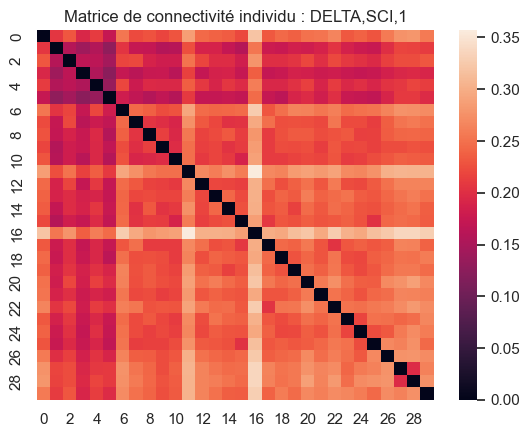

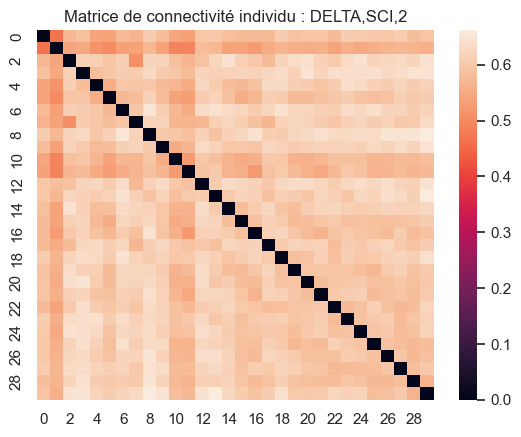

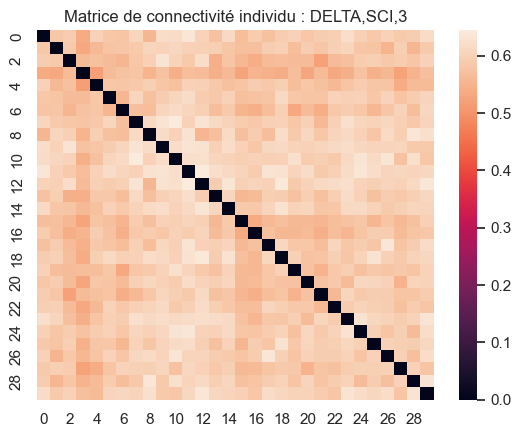

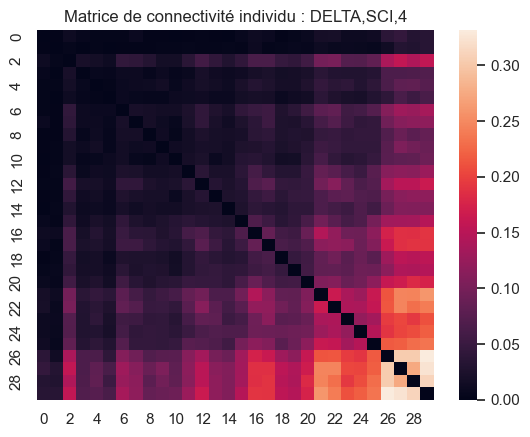

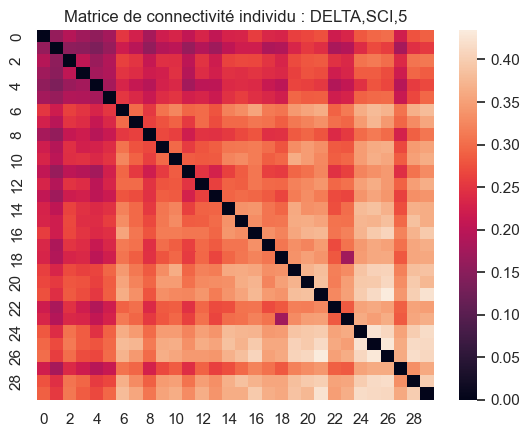

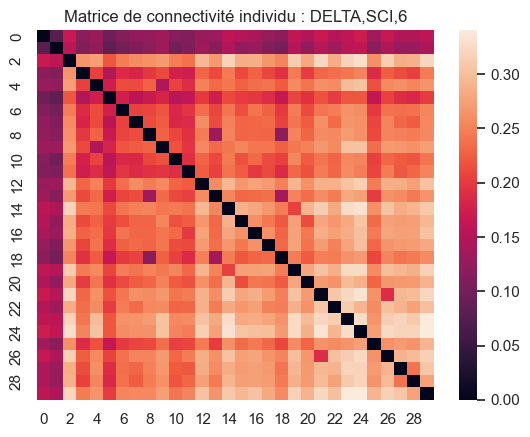

In [4]:
s = 2
c = 1
for i in range(6):
    M = loadmat('/Users/szeberinricsi/Documents/TRIED/mc/EpEn_Data_sans_diag_norm/'+ SIGN[s] + '/' + CLASS[c] + '/' + str(i + 1) + '.mat')[SIGN[s]]

    ax = sns.heatmap(M)

    plt.title("Matrice de connectivité individu : " + SIGN[s] + ',' + CLASS[c] + ',' + str(i + 1) ,fontsize=12)

    plt.show()

SCI/MCI THETA: peu d'information dans le signal, des valeurs très proches de 1

BETA AD : patern de 5 électrode d'écart : le signal semble se propager à la 5ème électrode plus loin (du à la disposition des électrodes sur le crâne 5 et 10 sont l'un au dessus de l'autre) -> de l'information en trop qui peut biaiser les résultats car ce n'est pas corrélé au type du signal ou à la classe de l'individu mais uniquement au placement des électrodes

BETA SCI : cadrillage

## Moyenne sur les colonnes

In [5]:
X = np.zeros((102,30*4))
Y = np.zeros((102,3))
column_names = []

In [6]:
N = [28, 22, 52]

In [7]:
offset = 0
for c in range(3):
    for i in range(N[c]):
        for s in range(4):
            x = loadmat('/Users/szeberinricsi/Documents/TRIED/mc/EpEn_Data_sans_diag_norm/'+ SIGN[s] + '/' + CLASS[c] + '/' + str(i + 1) + '.mat')[SIGN[s]].mean(axis = 0)
            y = np.zeros(3, dtype = int)
            y[c] = 1
            X[offset + i, 30*s: 30*(s+1)] = x
            Y[offset + i] = y
    offset += N[c]

In [8]:
X.shape

(102, 120)

In [9]:
Y.shape

(102, 3)

### Nom des colonnes

In [10]:
for s in range(4):
    for j in range(30):
        column_names.append(SIGN[s] + str(j + 1))

In [11]:
df_eeg = pd.DataFrame(X)
df_class = pd.DataFrame(Y)

In [12]:
df_eeg.columns = column_names
df_class.columns = CLASS

In [13]:
df_eeg.to_csv('DataMeanX.csv')
df_class.to_csv('DataMeanY.csv')

### Corrélation des nouvelles variables

In [23]:
df_eeg

,ALPHA1,ALPHA2,ALPHA3,ALPHA4,ALPHA5,ALPHA6,ALPHA7,ALPHA8,ALPHA9,ALPHA10,...,THETA21,THETA22,THETA23,THETA24,THETA25,THETA26,THETA27,THETA28,THETA29,THETA30
0,0.529101,0.527130,0.566652,0.577959,0.569572,0.578289,0.579298,0.573451,0.584732,0.586535,...,0.622183,0.617093,0.611025,0.612660,0.606257,0.611810,0.615822,0.606848,0.603331,0.607946
1,0.540025,0.568381,0.575273,0.542687,0.568088,0.540359,0.568920,0.579320,0.532797,0.564574,...,0.603594,0.603315,0.600146,0.594129,0.600234,0.597365,0.606214,0.614268,0.608000,0.601620
2,0.532103,0.550772,0.560160,0.572244,0.531342,0.573382,0.557099,0.571210,0.574568,0.562956,...,0.609684,0.610333,0.594659,0.610886,0.619287,0.606940,0.605582,0.601483,0.609871,0.612010
3,0.578045,0.584885,0.575775,0.586677,0.589660,0.584377,0.586213,0.582166,0.586291,0.589487,...,0.573188,0.597255,0.583837,0.572796,0.594126,0.592182,0.586725,0.574097,0.593726,0.603779
4,0.544777,0.549030,0.543405,0.542817,0.558174,0.561514,0.552992,0.548004,0.548579,0.565174,...,0.594178,0.594519,0.598396,0.602791,0.591980,0.597398,0.596430,0.591360,0.586248,0.589355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,0.560878,0.573456,0.551656,0.556854,0.556743,0.555030,0.570711,0.551499,0.555737,0.555439,...,0.594991,0.597545,0.602387,0.613158,0.614376,0.593984,0.603571,0.594725,0.592307,0.597556
98,0.536326,0.568765,0.574833,0.539618,0.562181,0.556902,0.565191,0.571854,0.554642,0.569833,...,0.601986,0.607630,0.601191,0.607506,0.601004,0.600709,0.601207,0.610460,0.605059,0.602665
99,0.533572,0.554761,0.563083,0.572069,0.549382,0.549869,0.552567,0.566368,0.564416,0.555439,...,0.597499,0.602697,0.604798,0.601092,0.604743,0.595808,0.602436,0.606319,0.602662,0.604494
100,0.612029,0.581205,0.576515,0.588063,0.604593,0.590390,0.566031,0.574869,0.583921,0.610265,...,0.592780,0.602285,0.598086,0.602033,0.596557,0.589116,0.598146,0.599036,0.605097,0.604409


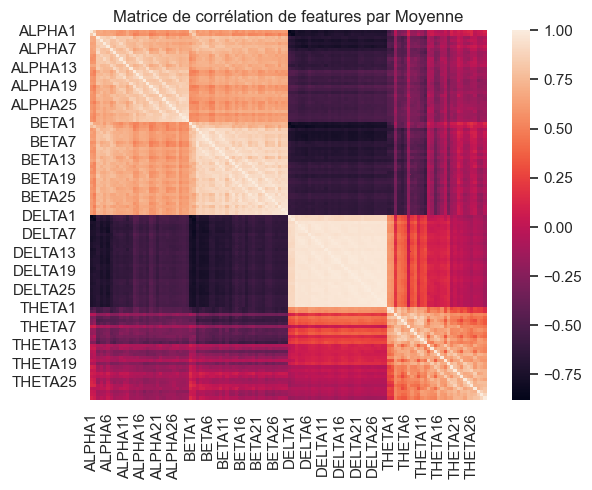

In [24]:
ax = sns.heatmap(df_eeg.corr())
plt.title('Matrice de corrélation de features par Moyenne')
plt.show()

In [14]:
df_class

,AD,SCI,MCI
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
...,...,...,...
97,0.0,0.0,1.0
98,0.0,0.0,1.0
99,0.0,0.0,1.0
100,0.0,0.0,1.0


### Sélection des variables

#### ACP

In [26]:
from sklearn.decomposition import PCA

In [27]:
acp = PCA()
acp.fit(X)
X_acp = acp.fit_transform(X)

In [28]:
plt.bar(np.arange(len(acp.explained_variance_ratio_))+1,acp.explained_variance_ratio_*100)
plt.plot(np.arange(len(acp.explained_variance_ratio_))+1,np.cumsum(acp.explained_variance_ratio_*100),'r--o')
plt.xlabel("Dimensions",fontsize=14)
plt.ylabel("% d'inertie expliquée",fontsize=14)
plt.title("Inertie expliquée en fonction du nombre de dimensions",fontsize=14);
plt.grid(True)

In [29]:
pourcentageDInertieSeuil = 99
d = np.argmax(np.cumsum(acp.explained_variance_ratio_)>=pourcentageDInertieSeuil/100)+1
print("Nombres de dimensions (>={:.0f}% inertie) : ".format(pourcentageDInertieSeuil),d)

Nombres de dimensions (>=99% inertie) :  28


In [30]:
plt.scatter(X_acp[:,2], X_acp[:, 3])

In [73]:
#print(model.scorer(X[test_indices], y[test_indices]))
print(( y_label[test_indices]))

[2]


In [104]:
from sklearn.neural_network import MLPClassifier
kf = LeaveOneOut()
#clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
model = LinearDiscriminantAnalysis(n_components = 2)
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)

for train_indices, test_indices in kf.split(X):
    X_train = model.fit_transform(X[train_indices], y_label[train_indices])
    #print('Accuracy' + str(accuracy_score(X[test_indices], y_label[test_indices])))
    X_test = model.transform(X[test_indices])
    clf.fit(X_train,  y_label[train_indices])
    print(clf.predict(X_test), y_label[test_indices])
    #print(X_train)


[2] [0]
[0] [0]
[0] [0]
[2] [0]
[2] [0]
[0] [0]
[2] [0]
[2] [0]
[2] [0]
[1] [0]
[0] [0]
[2] [0]
[2] [0]
[2] [0]
[0] [0]
[1] [0]
[2] [0]
[2] [0]
[1] [0]
[0] [0]
[2] [0]
[0] [0]
[2] [0]
[2] [0]
[0] [0]
[0] [0]
[0] [0]
[2] [0]
[2] [1]
[1] [1]
[1] [1]
[0] [1]
[2] [1]
[1] [1]
[0] [1]
[2] [1]
[2] [1]
[2] [1]
[0] [1]
[2] [1]
[0] [1]
[2] [1]
[1] [1]
[2] [1]
[0] [1]
[2] [1]
[2] [1]
[2] [1]
[0] [1]
[2] [1]
[0] [2]
[1] [2]
[0] [2]
[2] [2]
[2] [2]
[0] [2]
[0] [2]
[2] [2]
[0] [2]
[1] [2]
[0] [2]
[0] [2]
[0] [2]
[2] [2]
[0] [2]
[0] [2]
[2] [2]
[0] [2]
[0] [2]
[2] [2]
[0] [2]
[0] [2]
[0] [2]
[1] [2]
[0] [2]
[2] [2]
[0] [2]
[2] [2]
[2] [2]
[2] [2]
[2] [2]
[2] [2]
[2] [2]
[0] [2]
[0] [2]
[0] [2]
[0] [2]
[2] [2]
[0] [2]
[0] [2]
[0] [2]
[1] [2]
[2] [2]
[2] [2]
[2] [2]
[2] [2]
[2] [2]
[2] [2]
[1] [2]
[0] [2]
[0] [2]
[2] [2]


In [ ]:
from sklearn.model_selection import LeaveOneOut
from sklearn.neural_network import MLPClassifier


kf = LeaveOneOut()
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)

for train_indices, test_indices in kf.split(X):
    Model.fit(X[train_indices], y[train_indices])
    #print(Model.evaluate(X[test_indices], y[test_indices]))
    #print((X[test_indices], y[test_indices]))

In [86]:
y_label = Y.argmax(axis = 1)

In [65]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# evaluate a lda model on the dataset
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# define dataset
#X, y = make_classification(n_samples=1000, n_features=10, n_informative=10, n_redundant=0, random_state=1)
# define model
model = LinearDiscriminantAnalysis(n_components = 2)
# define model evaluation method
cv = LeaveOneOut() #RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y_label, scoring='accuracy', cv=100)
# summarize result
print(scores)
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

ValueError: n_splits=100 cannot be greater than the number of members in each class.

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(X, Y)
print(cm)
print('Accuracy' + str(accuracy_score(X, y_labrel)))

#### XG BOOST

In [33]:
from xgboost import XGBClassifier
from xgboost import plot_importance

In [34]:
y_label = Y.argmax(axis = 1)

[21:20:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


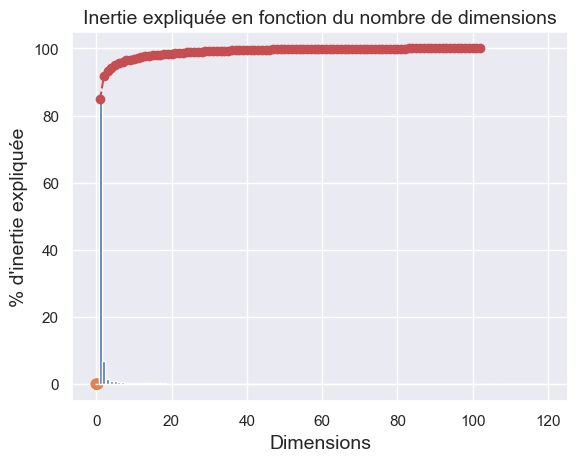

In [35]:
# fit model no training data
model = XGBClassifier()
model.fit(X, y_label)
# plot
plt.bar(range(len(model.feature_importances_)), np.sort(model.feature_importances_))
plt.show()

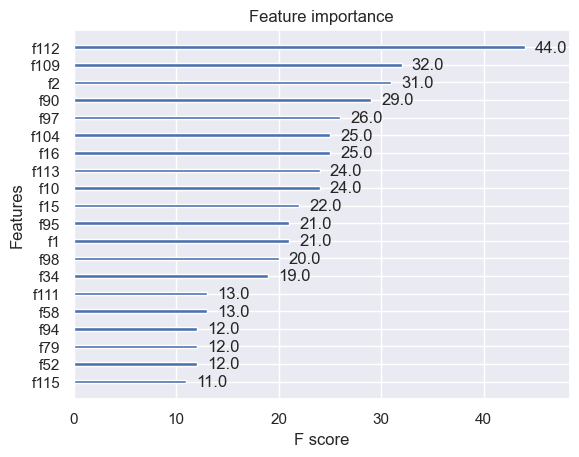

In [36]:
plot_importance(model, max_num_features=20)
plt.show()

#### Test pour différent thresholds

In [23]:
from numpy import loadtxt
from numpy import sort
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_label, test_size=0.15, random_state=7)
# fit model on all training data
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data and evaluate
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
accuracy_max = accuracy
print("Accuracy: %.2f%%" % (accuracy * 100.0))
# Fit model using each importance as a threshold
thresholds = sort(model.feature_importances_)
best_thresh = 0
    
for thresh in thresholds:
	# select features using threshold
	selection = SelectFromModel(model, threshold=thresh, prefit=True)
	select_X_train = selection.transform(X_train)
	# train model
	selection_model = XGBClassifier()
	selection_model.fit(select_X_train, y_train)
	# eval model
	select_X_test = selection.transform(X_test)
	y_pred = selection_model.predict(select_X_test)
	predictions = [round(value) for value in y_pred]
	accuracy = accuracy_score(y_test, predictions)
	if (accuracy >= accuracy_max):
		accuracy_max = accuracy
		best_thresh = thresh
	print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

[18:33:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 62.50%
[18:33:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Thresh=0.000, n=120, Accuracy: 62.50%
[18:33:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Thresh=0.000, n=120, Accuracy: 62.50%
[18:33:55] WARNING: /Users/runner/work/xgboost/xgboo

Thresh=0.000, n=94, Accuracy: 56.25%
[18:33:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Thresh=0.000, n=93, Accuracy: 56.25%
[18:33:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Thresh=0.000, n=92, Accuracy: 56.25%
[18:33:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Thresh=0.000, n=91, Accuracy: 50.0

Thresh=0.003, n=68, Accuracy: 56.25%
[18:33:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Thresh=0.003, n=67, Accuracy: 62.50%
[18:33:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Thresh=0.003, n=66, Accuracy: 62.50%
[18:33:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Thresh=0.003, n=65, Accuracy: 56.2

Thresh=0.008, n=41, Accuracy: 62.50%
[18:34:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Thresh=0.008, n=40, Accuracy: 62.50%
[18:34:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Thresh=0.009, n=39, Accuracy: 62.50%
[18:34:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Thresh=0.009, n=38, Accuracy: 62.5

Thresh=0.017, n=13, Accuracy: 50.00%
[18:34:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Thresh=0.018, n=12, Accuracy: 43.75%
[18:34:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Thresh=0.019, n=11, Accuracy: 50.00%
[18:34:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Thresh=0.019, n=10, Accuracy: 43.7

In [38]:
best_thresh

0.005073561

In [25]:
selection = SelectFromModel(model, threshold=best_thresh, prefit=True)
select_X = selection.transform(X)
feature_idx = selection.get_support()
feature_name = df_eeg.columns[feature_idx]

In [40]:
feature_name

Index(['ALPHA3', 'ALPHA4', 'ALPHA7', 'ALPHA9', 'ALPHA11', 'ALPHA16', 'ALPHA19',
       'ALPHA22', 'ALPHA26', 'ALPHA28', 'BETA1', 'BETA2', 'BETA3', 'BETA5',
       'BETA9', 'BETA17', 'BETA18', 'BETA20', 'BETA21', 'BETA22', 'BETA25',
       'BETA30', 'DELTA3', 'DELTA4', 'DELTA5', 'DELTA7', 'DELTA8', 'DELTA9',
       'DELTA10', 'DELTA13', 'DELTA17', 'DELTA18', 'DELTA19', 'DELTA20',
       'DELTA24', 'THETA2', 'THETA3', 'THETA5', 'THETA6', 'THETA7', 'THETA8',
       'THETA9', 'THETA11', 'THETA12', 'THETA13', 'THETA14', 'THETA19',
       'THETA20', 'THETA21', 'THETA22', 'THETA24', 'THETA25', 'THETA26',
       'THETA28'],
      dtype='object')

In [41]:
select_X.shape

(102, 54)

On choisi donc les 54 variables qui ont la meilleur importance

In [26]:
dfx_select = pd.DataFrame(select_X)
dfx_select.columns = feature_name

In [ ]:
dfx_select

## Modèle de classification

### AD vs SCI, AD vs MCI, SCI vs MCI

In [20]:
from sklearn.utils import shuffle

In [27]:
dfx_AD_SCI = pd.concat([dfx_select[df_class['AD'] == 1], dfx_select[df_class['SCI'] == 1]])
dfx_AD_MCI = pd.concat([dfx_select[df_class['AD'] == 1], dfx_select[df_class['MCI'] == 1]])
dfx_SCI_MCI = pd.concat([dfx_select[df_class['SCI'] == 1], dfx_select[df_class['MCI'] == 1]])

In [29]:
dfy_AD_SCI = pd.concat([df_class[df_class['AD'] == 1], df_class[df_class['SCI'] == 1]])
dfy_AD_MCI = pd.concat([df_class[df_class['AD'] == 1], df_class[df_class['MCI'] == 1]])
dfy_SCI_MCI = pd.concat([df_class[df_class['SCI'] == 1], df_class[df_class['MCI'] == 1]])

In [47]:
dfy_AD_MCI

,AD,SCI,MCI
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
...,...,...,...
97,0.0,0.0,1.0
98,0.0,0.0,1.0
99,0.0,0.0,1.0
100,0.0,0.0,1.0


In [30]:
X_AD_SCI, Y_AD_SCI = shuffle(dfx_AD_SCI.values, dfy_AD_SCI.values, random_state=0)
X_AD_MCI, Y_AD_MCI = shuffle(dfx_AD_MCI.values, dfy_AD_MCI.values, random_state=0)
X_SCI_MCI, Y_SCI_MCI = shuffle(dfx_SCI_MCI.values, dfy_SCI_MCI.values, random_state=0)

In [49]:
X_SCI_MCI.shape

(74, 54)

Il n'y a pas assez de données X_AD_SCI : il y a plus de features que d'individus, découper en train et test set semble être incohérent avec la taille des données. De plus les classes ne sont pas autant représentées 22 vs 28, 22 vs 52, 28 vs 52

### MLP

In [58]:
import tensorflow as tf

In [59]:
Model = tf.keras.Sequential()
Model.add(tf.keras.layers.Input(X_AD_SCI.shape[1]))
Model.add(tf.keras.layers.Dense(10, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(1e-4)))
Model.add(tf.keras.layers.Dense(10, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(1e-4)))
Model.add(tf.keras.layers.Dense(10, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(1e-4)))
Model.add(tf.keras.layers.Dense(3, activation = 'softmax'))

In [60]:
Model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                550       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 33        
Total params: 803
Trainable params: 803
Non-trainable params: 0
_________________________________________________________________


In [61]:
lr = 0.01
Model.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(lr), metrics=['accuracy'])

In [62]:
nb_epoch = 100
batch_size = 1
hist = Model.fit(X_SCI_MCI, Y_SCI_MCI, batch_size=batch_size, epochs=nb_epoch)

Epoch 1/100
74/74 [==============================] - 1s 870us/step - loss: 0.7102 - accuracy: 0.7608
Epoch 2/100
74/74 [==============================] - 0s 841us/step - loss: 0.6682 - accuracy: 0.7113
Epoch 3/100
74/74 [==============================] - 0s 827us/step - loss: 0.6382 - accuracy: 0.7154
Epoch 4/100
74/74 [==============================] - 0s 839us/step - loss: 0.5754 - accuracy: 0.7664
Epoch 5/100
74/74 [==============================] - 0s 820us/step - loss: 0.5910 - accuracy: 0.7799
Epoch 6/100
74/74 [==============================] - 0s 1ms/step - loss: 0.6094 - accuracy: 0.7163
Epoch 7/100
74/74 [==============================] - 0s 873us/step - loss: 0.6116 - accuracy: 0.7104
Epoch 8/100
74/74 [==============================] - 0s 850us/step - loss: 0.6001 - accuracy: 0.7157
Epoch 9/100
74/74 [==============================] - 0s 870us/step - loss: 0.5365 - accuracy: 0.7608
Epoch 10/100
74/74 [==============================] - 0s 1ms/step - loss: 0.5316 - accuracy: 

Text(0, 0.5, 'accuracy')

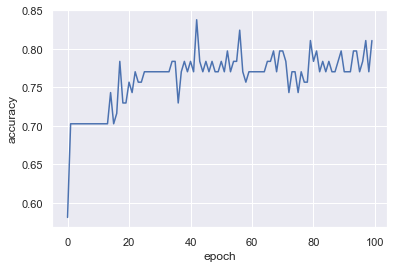

In [173]:
plt.plot(hist.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')

# MCI - SCI

## LOO


# MCI - SCI

## LOO


In [76]:
X = X_SCI_MCI
y = Y_SCI_MCI

In [84]:
from sklearn.model_selection import LeaveOneOut
from sklearn.neural_network import MLPClassifier


kf = LeaveOneOut()
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)

for train_indices, test_indices in kf.split(X):
    Model.fit(X[train_indices], y[train_indices])
    #print(Model.evaluate(X[test_indices], y[test_indices]))
    #print((X[test_indices], y[test_indices]))

3/3 [==============================] - 0s 2ms/step - loss: 0.5363 - accuracy: 0.7671


# lOOCV

In [103]:
mlp_gs = MLPClassifier(max_iter=100)
parameter_space = {
    'hidden_layer_sizes': [(10,30,10),(20,), (5,2), (5,5,2), (10,5,5,2)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam', 'lbfgs'],
    'alpha': [0.0001, 1e-5, 0.01, 0.05],
    'learning_rate': ['constant','adaptive'],
    'warm_start' : [True, False]
}
from sklearn.model_selection import GridSearchCV
gscv1 = GridSearchCV(mlp_gs, parameter_space, n_jobs=-1, cv=len(X))
gscv1.fit(X, y) # X is train samples and y is the corresponding labels

GridSearchCV(cv=74, estimator=MLPClassifier(max_iter=100), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 1e-05, 0.01, 0.05],
                         'hidden_layer_sizes': [(10, 30, 10), (20,), (5, 2),
                                                (5, 5, 2), (10, 5, 5, 2)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam', 'lbfgs'],
                         'warm_start': [True, False]})

In [104]:
print('Best parameters found:\n', gscv1.best_params_)

Best parameters found:
 {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (5, 5, 2), 'learning_rate': 'constant', 'solver': 'lbfgs', 'warm_start': True}


In [105]:
means = gscv1.cv_results_['mean_test_score']
stds = gscv1.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, gscv1.cv_results_['params']):
    if (mean > 0.79):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

0.811 (+/-0.783) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (5, 5, 2), 'learning_rate': 'constant', 'solver': 'lbfgs', 'warm_start': True}
0.797 (+/-0.804) for {'activation': 'tanh', 'alpha': 1e-05, 'hidden_layer_sizes': (20,), 'learning_rate': 'adaptive', 'solver': 'lbfgs', 'warm_start': True}
0.811 (+/-0.783) for {'activation': 'tanh', 'alpha': 1e-05, 'hidden_layer_sizes': (10, 5, 5, 2), 'learning_rate': 'constant', 'solver': 'lbfgs', 'warm_start': False}
0.797 (+/-0.804) for {'activation': 'relu', 'alpha': 1e-05, 'hidden_layer_sizes': (10, 30, 10), 'learning_rate': 'adaptive', 'solver': 'lbfgs', 'warm_start': True}
0.797 (+/-0.804) for {'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (10, 30, 10), 'learning_rate': 'adaptive', 'solver': 'lbfgs', 'warm_start': True}
0.797 (+/-0.804) for {'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (20,), 'learning_rate': 'adaptive', 'solver': 'lbfgs', 'warm_start': True}


In [106]:
y_true, y_pred = y , gscv1.predict(X)
from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_true, y_pred))

Results on the test set:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.83      0.86      0.84        22
           2       0.94      0.92      0.93        52

   micro avg       0.91      0.91      0.91        74
   macro avg       0.59      0.60      0.59        74
weighted avg       0.91      0.91      0.91        74
 samples avg       0.91      0.91      0.91        74



# 5fold

In [92]:
mlp_gs = MLPClassifier(max_iter=100)
parameter_space = {
    'hidden_layer_sizes': [(10,30,10),(20,), (5,2), (5, 10, 5), (5,5,2), (10,5,5,2)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam', 'lbfgs'],
    'alpha': [0.0001, 1e-5, 0.01, 0.05],
    'learning_rate': ['constant','adaptive'],
    'warm_start' : [True, False]
}
from sklearn.model_selection import GridSearchCV
gscv = GridSearchCV(mlp_gs, parameter_space, n_jobs=-1, cv=5)
gscv.fit(X, y) # X is train samples and y is the corresponding labels

GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=100), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 1e-05, 0.01, 0.05],
                         'hidden_layer_sizes': [(10, 30, 10), (20,), (5, 2),
                                                (5, 10, 5), (5, 5, 2),
                                                (10, 5, 5, 2)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam', 'lbfgs'],
                         'warm_start': [True, False]})

In [93]:
print('Best parameters found:\n', gscv.best_params_)

Best parameters found:
 {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 5, 5, 2), 'learning_rate': 'adaptive', 'solver': 'lbfgs', 'warm_start': True}


In [101]:
means = gscv.cv_results_['mean_test_score']
stds = gscv.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, gscv.cv_results_['params']):
    if (mean > 0.79):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params)) 

0.796 (+/-0.194) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (5, 10, 5), 'learning_rate': 'adaptive', 'solver': 'lbfgs', 'warm_start': True}
0.796 (+/-0.154) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 5, 5, 2), 'learning_rate': 'constant', 'solver': 'lbfgs', 'warm_start': True}
0.810 (+/-0.132) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 5, 5, 2), 'learning_rate': 'adaptive', 'solver': 'lbfgs', 'warm_start': True}
0.797 (+/-0.147) for {'activation': 'tanh', 'alpha': 1e-05, 'hidden_layer_sizes': (10, 5, 5, 2), 'learning_rate': 'constant', 'solver': 'lbfgs', 'warm_start': True}
0.810 (+/-0.220) for {'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': (10, 5, 5, 2), 'learning_rate': 'adaptive', 'solver': 'lbfgs', 'warm_start': False}
0.797 (+/-0.189) for {'activation': 'relu', 'alpha': 1e-05, 'hidden_layer_sizes': (5, 5, 2), 'learning_rate': 'constant', 'solver': 'lbfgs', 'warm_start': False}
0.796 (+/-0.2

In [102]:
y_true, y_pred = y , gscv.predict(X)
from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_true, y_pred))

Results on the test set:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.50      0.67        22
           2       0.82      0.98      0.89        52

   micro avg       0.85      0.84      0.84        74
   macro avg       0.61      0.49      0.52        74
weighted avg       0.88      0.84      0.83        74
 samples avg       0.84      0.84      0.84        74



# AD - SCI

## LOO


In [108]:
X = X_AD_SCI
y = Y_AD_SCI

# lOOCV

In [110]:
mlp_gs = MLPClassifier(max_iter=100)
parameter_space = {
    'hidden_layer_sizes': [(10,30,10),(20,), (5,2), (5,5,2), (10,5,5,2)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam', 'lbfgs'],
    'alpha': [0.0001, 1e-5, 0.01, 0.05],
    'learning_rate': ['constant','adaptive'],
    'warm_start' : [True, False]
}
from sklearn.model_selection import GridSearchCV
gscv1 = GridSearchCV(mlp_gs, parameter_space, n_jobs=-1, cv=len(X))
gscv1.fit(X, y) # X is train samples and y is the corresponding labels

GridSearchCV(cv=50, estimator=MLPClassifier(max_iter=100), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 1e-05, 0.01, 0.05],
                         'hidden_layer_sizes': [(10, 30, 10), (20,), (5, 2),
                                                (5, 5, 2), (10, 5, 5, 2)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam', 'lbfgs'],
                         'warm_start': [True, False]})

In [111]:
print('Best parameters found:\n', gscv1.best_params_)

Best parameters found:
 {'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (5, 2), 'learning_rate': 'adaptive', 'solver': 'lbfgs', 'warm_start': False}


In [119]:
means = gscv1.cv_results_['mean_test_score']
stds = gscv1.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, gscv1.cv_results_['params']):
    if (mean > 0.59):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

0.640 (+/-0.960) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (5, 2), 'learning_rate': 'constant', 'solver': 'lbfgs', 'warm_start': False}
0.600 (+/-0.980) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (5, 2), 'learning_rate': 'adaptive', 'solver': 'lbfgs', 'warm_start': True}
0.620 (+/-0.971) for {'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': (5, 5, 2), 'learning_rate': 'constant', 'solver': 'lbfgs', 'warm_start': True}
0.600 (+/-0.980) for {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (5, 2), 'learning_rate': 'adaptive', 'solver': 'lbfgs', 'warm_start': False}
0.640 (+/-0.960) for {'activation': 'relu', 'alpha': 1e-05, 'hidden_layer_sizes': (5, 2), 'learning_rate': 'adaptive', 'solver': 'lbfgs', 'warm_start': True}
0.600 (+/-0.980) for {'activation': 'relu', 'alpha': 1e-05, 'hidden_layer_sizes': (5, 5, 2), 'learning_rate': 'constant', 'solver': 'lbfgs', 'warm_start': False}
0.640 (+/-0.960) for {'activation': 'relu

In [120]:
y_true, y_pred = y , gscv1.predict(X)
from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_true, y_pred))

Results on the test set:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89        28
           1       0.76      0.86      0.81        22
           2       0.00      0.00      0.00         0

   micro avg       0.78      0.94      0.85        50
   macro avg       0.52      0.62      0.57        50
weighted avg       0.78      0.94      0.85        50
 samples avg       0.84      0.94      0.87        50



# 5fold

In [114]:
mlp_gs = MLPClassifier(max_iter=100)
parameter_space = {
    'hidden_layer_sizes': [(10,30,10),(20,), (5,2), (5, 10, 5), (5,5,2), (10,5,5,2)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam', 'lbfgs'],
    'alpha': [0.0001, 1e-5, 0.01, 0.05],
    'learning_rate': ['constant','adaptive'],
    'warm_start' : [True, False]
}
from sklearn.model_selection import GridSearchCV
gscv = GridSearchCV(mlp_gs, parameter_space, n_jobs=-1, cv=5)
gscv.fit(X, y) # X is train samples and y is the corresponding labels

GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=100), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 1e-05, 0.01, 0.05],
                         'hidden_layer_sizes': [(10, 30, 10), (20,), (5, 2),
                                                (5, 10, 5), (5, 5, 2),
                                                (10, 5, 5, 2)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam', 'lbfgs'],
                         'warm_start': [True, False]})

In [115]:
print('Best parameters found:\n', gscv.best_params_)

Best parameters found:
 {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 5, 5, 2), 'learning_rate': 'constant', 'solver': 'lbfgs', 'warm_start': True}


In [121]:
means = gscv.cv_results_['mean_test_score']
stds = gscv.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, gscv.cv_results_['params']):
    if (mean > 0.59):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params)) 

0.600 (+/-0.126) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (5, 5, 2), 'learning_rate': 'adaptive', 'solver': 'sgd', 'warm_start': True}
0.660 (+/-0.271) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 5, 5, 2), 'learning_rate': 'constant', 'solver': 'lbfgs', 'warm_start': True}
0.640 (+/-0.204) for {'activation': 'tanh', 'alpha': 1e-05, 'hidden_layer_sizes': (10, 5, 5, 2), 'learning_rate': 'constant', 'solver': 'lbfgs', 'warm_start': True}
0.600 (+/-0.179) for {'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': (10, 30, 10), 'learning_rate': 'constant', 'solver': 'lbfgs', 'warm_start': False}
0.600 (+/-0.179) for {'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': (20,), 'learning_rate': 'adaptive', 'solver': 'lbfgs', 'warm_start': False}
0.600 (+/-0.126) for {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (5, 2), 'learning_rate': 'constant', 'solver': 'lbfgs', 'warm_start': False}
0.600 (+/-0.283) for {'activ

In [117]:
y_true, y_pred = y , gscv.predict(X)
from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_true, y_pred))

Results on the test set:
              precision    recall  f1-score   support

           0       0.56      1.00      0.72        28
           1       0.00      0.00      0.00        22
           2       0.00      0.00      0.00         0

   micro avg       0.56      0.56      0.56        50
   macro avg       0.19      0.33      0.24        50
weighted avg       0.31      0.56      0.40        50
 samples avg       0.56      0.56      0.56        50



In [118]:
len(X)

50

# AD - MCI

In [122]:
X = X_AD_MCI
y = Y_AD_MCI

# lOOCV

In [146]:
mlp_gs = MLPClassifier(max_iter=100)
parameter_space = {
    'hidden_layer_sizes': [(10,30,10),(20,), (5,2), (5,5,2), (10,5,5,2), (10,10,10,3)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam', 'lbfgs'],
    'alpha': [0.0001, 1e-5, 0.01, 0.05],
    'learning_rate': ['constant','adaptive'],
    'warm_start' : [True, False]
}
from sklearn.model_selection import GridSearchCV
gscv1 = GridSearchCV(mlp_gs, parameter_space, n_jobs=-1, cv=len(X))
gscv1.fit(X, y) # X is train samples and y is the corresponding labels

GridSearchCV(cv=50, estimator=MLPClassifier(max_iter=100), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 1e-05, 0.01, 0.05],
                         'hidden_layer_sizes': [(10, 30, 10), (20,), (5, 2),
                                                (5, 5, 2), (10, 5, 5, 2),
                                                (10, 10, 10, 3)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam', 'lbfgs'],
                         'warm_start': [True, False]})

In [147]:
print('Best parameters found:\n', gscv1.best_params_)

Best parameters found:
 {'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': (10, 5, 5, 2), 'learning_rate': 'constant', 'solver': 'lbfgs', 'warm_start': True}


In [150]:
means = gscv1.cv_results_['mean_test_score']
stds = gscv1.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, gscv1.cv_results_['params']):
    if (mean > 0.65):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

0.660 (+/-0.947) for {'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': (10, 5, 5, 2), 'learning_rate': 'constant', 'solver': 'lbfgs', 'warm_start': True}


In [126]:
y_true, y_pred = y , gscv1.predict(X)
from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_true, y_pred))

Results on the test set:
              precision    recall  f1-score   support

           0       0.91      0.75      0.82        28
           1       0.00      0.00      0.00         0
           2       0.88      0.96      0.92        52

   micro avg       0.89      0.89      0.89        80
   macro avg       0.60      0.57      0.58        80
weighted avg       0.89      0.89      0.88        80
 samples avg       0.89      0.89      0.89        80



# 5fold

In [127]:
mlp_gs = MLPClassifier(max_iter=100)
parameter_space = {
    'hidden_layer_sizes': [(10,30,10),(20,), (5,2), (5, 10, 5), (5,5,2), (10,5,5,2)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam', 'lbfgs'],
    'alpha': [0.0001, 1e-5, 0.01, 0.05],
    'learning_rate': ['constant','adaptive'],
    'warm_start' : [True, False]
}
from sklearn.model_selection import GridSearchCV
gscv = GridSearchCV(mlp_gs, parameter_space, n_jobs=-1, cv=5)
gscv.fit(X, y) # X is train samples and y is the corresponding labels

GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=100), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 1e-05, 0.01, 0.05],
                         'hidden_layer_sizes': [(10, 30, 10), (20,), (5, 2),
                                                (5, 10, 5), (5, 5, 2),
                                                (10, 5, 5, 2)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam', 'lbfgs'],
                         'warm_start': [True, False]})

In [128]:
print('Best parameters found:\n', gscv.best_params_)

Best parameters found:
 {'activation': 'relu', 'alpha': 1e-05, 'hidden_layer_sizes': (5, 10, 5), 'learning_rate': 'constant', 'solver': 'lbfgs', 'warm_start': True}


In [129]:
means = gscv.cv_results_['mean_test_score']
stds = gscv.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, gscv.cv_results_['params']):
    if (mean > 0.79):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params)) 

In [130]:
y_true, y_pred = y , gscv.predict(X)
from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_true, y_pred))

Results on the test set:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        28
           1       0.00      0.00      0.00         0
           2       0.65      1.00      0.79        52

   micro avg       0.65      0.65      0.65        80
   macro avg       0.22      0.33      0.26        80
weighted avg       0.42      0.65      0.51        80
 samples avg       0.65      0.65      0.65        80



In [131]:
len(X)

80

# AD - SCI



## LOO



In [135]:

X = X_AD_SCI
y = Y_AD_SCI





# lOOCV


In [137]:

mlp_gs = MLPClassifier(max_iter=100)
parameter_space = {
    'hidden_layer_sizes': [(10,30,10),(20,), (5,2), (5,5,2), (10,5,5,2)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam', 'lbfgs'],
    'alpha': [0.0001, 1e-5, 0.01, 0.05],
    'learning_rate': ['constant','adaptive'],
    'warm_start' : [True, False]
}
from sklearn.model_selection import GridSearchCV
gscv1 = GridSearchCV(mlp_gs, parameter_space, n_jobs=-1, cv=len(X))
gscv1.fit(X, y) # X is train samples and y is the corresponding labels

print('Best parameters found:\n', gscv1.best_params_)


Best parameters found:
 {'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': (5, 5, 2), 'learning_rate': 'adaptive', 'solver': 'lbfgs', 'warm_start': True}


In [145]:

means = gscv1.cv_results_['mean_test_score']
stds = gscv1.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, gscv1.cv_results_['params']):
    if (mean > 0.61):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

0.620 (+/-0.971) for {'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': (5, 2), 'learning_rate': 'constant', 'solver': 'lbfgs', 'warm_start': False}
0.640 (+/-0.960) for {'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': (5, 5, 2), 'learning_rate': 'adaptive', 'solver': 'lbfgs', 'warm_start': True}
0.620 (+/-0.971) for {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (5, 2), 'learning_rate': 'adaptive', 'solver': 'lbfgs', 'warm_start': False}
0.640 (+/-0.960) for {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (5, 5, 2), 'learning_rate': 'constant', 'solver': 'lbfgs', 'warm_start': False}
0.640 (+/-0.960) for {'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (10, 5, 5, 2), 'learning_rate': 'adaptive', 'solver': 'lbfgs', 'warm_start': False}


In [138]:


y_true, y_pred = y , gscv1.predict(X)
from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_true, y_pred))


Results on the test set:
              precision    recall  f1-score   support

           0       0.56      1.00      0.72        28
           1       0.00      0.00      0.00        22
           2       0.00      0.00      0.00         0

   micro avg       0.56      0.56      0.56        50
   macro avg       0.19      0.33      0.24        50
weighted avg       0.31      0.56      0.40        50
 samples avg       0.56      0.56      0.56        50




# 5fold


In [139]:

mlp_gs = MLPClassifier(max_iter=100)
parameter_space = {
    'hidden_layer_sizes': [(10,30,10),(20,), (5,2), (5, 10, 5), (5,5,2), (10,5,5,2)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam', 'lbfgs'],
    'alpha': [0.0001, 1e-5, 0.01, 0.05],
    'learning_rate': ['constant','adaptive'],
    'warm_start' : [True, False]
}
from sklearn.model_selection import GridSearchCV
gscv = GridSearchCV(mlp_gs, parameter_space, n_jobs=-1, cv=5)
gscv.fit(X, y) # X is train samples and y is the corresponding labels

print('Best parameters found:\n', gscv.best_params_)


Best parameters found:
 {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (5, 2), 'learning_rate': 'constant', 'solver': 'lbfgs', 'warm_start': False}


In [143]:

means = gscv.cv_results_['mean_test_score']
stds = gscv.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, gscv.cv_results_['params']):
    if (mean > 0.61):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params)) 




0.640 (+/-0.299) for {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (5, 2), 'learning_rate': 'constant', 'solver': 'lbfgs', 'warm_start': False}
0.620 (+/-0.150) for {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 5, 5, 2), 'learning_rate': 'adaptive', 'solver': 'lbfgs', 'warm_start': False}
0.620 (+/-0.265) for {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (10, 5, 5, 2), 'learning_rate': 'constant', 'solver': 'lbfgs', 'warm_start': False}
0.640 (+/-0.160) for {'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (5, 2), 'learning_rate': 'adaptive', 'solver': 'lbfgs', 'warm_start': False}


In [141]:
y_true, y_pred = y , gscv.predict(X)
from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_true, y_pred))


Results on the test set:
              precision    recall  f1-score   support

           0       0.56      1.00      0.72        28
           1       0.00      0.00      0.00        22
           2       0.00      0.00      0.00         0

   micro avg       0.56      0.56      0.56        50
   macro avg       0.19      0.33      0.24        50
weighted avg       0.31      0.56      0.40        50
 samples avg       0.56      0.56      0.56        50

